In [1]:
sc


<SparkContext master=local[*] appName=PySparkShell>

In [2]:
sc.master

'local[*]'

In [3]:
import re
from operator import add

In [4]:
#loading the data from hadoop to pyspark and using the multiline option so the columns don't interchange
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("Import CSV").getOrCreate()

# Read the CSV file
df = spark.read.format("csv").option("header", "true").option("multiline", "true").load("/farmers/tweets.csv")

# Print the first 5 rows of the data frame
df.show(5)


23/05/24 22:24:26 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+--------------------+--------------------+--------------------+--------------------+--------------------+----------+------------+---------+----------+--------------------+--------------------+--------------+-----------+--------------+
|            tweetUrl|                date|     renderedContent|             tweetId|              userId|replyCount|retweetCount|likeCount|quoteCount|              source|               media|retweetedTweet|quotedTweet|mentionedUsers|
+--------------------+--------------------+--------------------+--------------------+--------------------+----------+------------+---------+----------+--------------------+--------------------+--------------+-----------+--------------+
|https://twitter.c...|2021-03-30 03:33:...|Support 👇\n\n#Fa...|1.376739399593910...|1.015969769760096...|         0|           0|        0|         0|"<a href=""http:/...|                null|          null|       null|          null|
|https://twitter.c...|2021-03-30 03:33:...|Supporting far

In [5]:
# Select the columns of interest
selected_cols = [ 'date','renderedContent']
df_selected = df.select(selected_cols)

# Print the first 5 rows of the selected data frame
df_selected.show(20)

+--------------------+--------------------+
|                date|     renderedContent|
+--------------------+--------------------+
|2021-03-30 03:33:...|Support 👇\n\n#Fa...|
|2021-03-30 03:33:...|Supporting farmer...|
|2021-03-30 03:31:...|Support farmers i...|
|2021-03-30 03:30:...|#StopHateAgainstF...|
|2021-03-30 03:30:...|You hate farmers ...|
|2021-03-30 03:29:...|They can't be far...|
|2021-03-30 03:28:...|Lets not forget t...|
|2021-03-30 03:28:...|@Troll48611422 @D...|
|2021-03-30 03:28:...|Neutrality helps ...|
|2021-03-30 03:28:...|Why You Should Vi...|
|2021-03-30 03:27:...|Stop asking God t...|
|2021-03-30 03:27:...|Great read to gai...|
|2021-03-30 03:27:...|#होली_के_रंग_किसा...|
|2021-03-30 03:27:...|@iaminnocentkid Y...|
|2021-03-30 03:27:...|Start Love With F...|
|2021-03-30 03:26:...|Love the picture ...|
|2021-03-30 03:26:...|So much suffering...|
|2021-03-30 03:26:...|The true definati...|
|2021-03-30 03:26:...|@dil_di_awaz Dont...|
|2021-03-30 03:25:...|Instead of 

In [6]:
import pandas as pd

# Select the columns of interest
selected_cols = ['date', 'renderedContent']
df_selected = df.select(selected_cols)

# Filter out rows with null or None values in 'renderedContent' column
df_filtered = df_selected.filter(df_selected.renderedContent.isNotNull())

# Convert Spark DataFrame to Pandas DataFrame
farmers_df = df_filtered.toPandas()

# Print the first 20 rows of the Pandas DataFrame
farmers_df.head(5)


,date,renderedContent
0,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the..."


In [7]:
#arrange the data and sort them by year and month

# Select the columns of interest
selected_cols = ['date', 'renderedContent']
df_selected = df.select(selected_cols)

# Filter out rows with null or None values in 'renderedContent' column
df_filtered = df_selected.filter(df_selected.renderedContent.isNotNull())

# Convert Spark DataFrame to Pandas DataFrame
farmers_df = df_filtered.toPandas()

# Convert 'date' column to datetime type with error handling
farmers_df['date'] = pd.to_datetime(farmers_df['date'], errors='coerce')

# Drop rows with null or invalid dates
farmers_df = farmers_df.dropna(subset=['date'])

# Create 'year' and 'month' columns
farmers_df['year'] = farmers_df['date'].dt.year
farmers_df['month'] = farmers_df['date'].dt.month

# Sort the DataFrame by 'year' and 'month'
farmers_df = farmers_df.sort_values(['year', 'month'])

# Print the first rows of the updated Pandas DataFrame
farmers_df.head(5)


,date,renderedContent,year,month
632093,2020-11-30 23:57:57+00:00,Our mother are our pride. If you are for sale ...,2020,11
632094,2020-11-30 23:56:47+00:00,Thank you @TimUppal We are very thankful to yo...,2020,11
632095,2020-11-30 23:55:24+00:00,Tag/tweet those who you feel will get our voic...,2020,11
632096,2020-11-30 23:55:19+00:00,With ur warmest wishesWe need ur tweets s well...,2020,11
632097,2020-11-30 23:55:00+00:00,Thank you @jazzyb @iamdeepsidhu @BawaRanjit br...,2020,11


In [8]:
#Removing the timestamp from the data
farmers_df['date'] = farmers_df['date'].dt.date


In [9]:
# Select the columns of interest
selected_cols = ['date', 'renderedContent']
df_selected = df.select(selected_cols)

# Filter out rows with null or None values in 'renderedContent' column
df_filtered = df_selected.filter(df_selected.renderedContent.isNotNull())

# Convert Spark DataFrame to Pandas DataFrame
farmers_df = df_filtered.toPandas()

# Convert 'date' column to datetime type with error handling
farmers_df['date'] = pd.to_datetime(farmers_df['date'], errors='coerce')

# Drop rows with null or invalid dates
farmers_df = farmers_df.dropna(subset=['date'])

# Create 'year' and 'month' columns
farmers_df['year'] = farmers_df['date'].dt.year
farmers_df['month'] = farmers_df['date'].dt.month

# Sort the DataFrame by 'year' and 'month'
farmers_df = farmers_df.sort_values(['year', 'month'])

# Remove the timestamp from the 'date' column
farmers_df['date'] = farmers_df['date'].dt.date

# Convert 'date' column to datetime type again
farmers_df['date'] = pd.to_datetime(farmers_df['date'], errors='coerce')

# Print the first 5 rows of the updated Pandas DataFrame
farmers_df.head(5)


,date,renderedContent,year,month
632093,2020-11-30,Our mother are our pride. If you are for sale ...,2020,11
632094,2020-11-30,Thank you @TimUppal We are very thankful to yo...,2020,11
632095,2020-11-30,Tag/tweet those who you feel will get our voic...,2020,11
632096,2020-11-30,With ur warmest wishesWe need ur tweets s well...,2020,11
632097,2020-11-30,Thank you @jazzyb @iamdeepsidhu @BawaRanjit br...,2020,11


###### Taking random samples of the data from each month and year because the file is too large

In [10]:
import pandas as pd
import numpy as np

# Select the columns of interest
selected_cols = ['date', 'renderedContent']
df_selected = df.select(selected_cols)

# Filter out rows with null or None values in 'renderedContent' column
df_filtered = df_selected.filter(df_selected.renderedContent.isNotNull())

# Convert Spark DataFrame to Pandas DataFrame
farmers_df = df_filtered.toPandas()

# Convert 'date' column to datetime type with error handling
farmers_df['date'] = pd.to_datetime(farmers_df['date'], errors='coerce')

# Create 'year' and 'month' columns
farmers_df['year'] = farmers_df['date'].dt.year
farmers_df['month'] = farmers_df['date'].dt.month

# Initialize an empty DataFrame to store the sampled rows
protest_df = pd.DataFrame()

# Iterate over unique year and month combinations
for (year, month), group in farmers_df.groupby(['year', 'month']):
    # Randomly sample 5000 rows from the group
    sampled_group = group.sample(n=min(500, len(group)), random_state=42)
    # Append the sampled group to the overall sampled DataFrame
    protest_df = pd.concat([protest_df, sampled_group])

# Remove the timestamp from the 'date' column
protest_df['date'] = protest_df['date'].dt.date

# Convert 'date' column to datetime type
protest_df['date'] = pd.to_datetime(protest_df['date'])

# Reset the index of the sampled DataFrame
protest_df = protest_df.reset_index(drop=True)

# Print the first 5 rows of the sampled DataFrame
protest_df.head(5)


,date,renderedContent,year,month
0,2020-11-27,2014: Bahut hua kisano par war Abki bar Modi s...,2020.0,11.0
1,2020-11-29,‘Modi media’ go back 🤣. \n#FarmersProtest #Tak...,2020.0,11.0
2,2020-11-30,#supportfarmers \n#FarmersProtest \n#FarmerPro...,2020.0,11.0
3,2020-11-27,We have every rite to protest #FarmersProtest ...,2020.0,11.0
4,2020-11-30,Madam shera di kom a we dnt think about fame o...,2020.0,11.0


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-05-24 22:25:40.361878: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-24 22:25:40.363623: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 22:25:40.412851: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 22:25:40.413105: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appr

## PREPROCESSING THE TEXT DATA

In [12]:
#checking for stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
protest_df['stopwords'] = protest_df['renderedContent'].apply(lambda x: len([x for x in x.split() if x in stop]))
protest_df[['renderedContent','stopwords']].head()


,renderedContent,stopwords
0,2014: Bahut hua kisano par war Abki bar Modi s...,6
1,‘Modi media’ go back 🤣. \n#FarmersProtest #Tak...,5
2,#supportfarmers \n#FarmersProtest \n#FarmerPro...,1
3,We have every rite to protest #FarmersProtest ...,4
4,Madam shera di kom a we dnt think about fame o...,15


In [13]:
#remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
protest_df['renderedContent'] = protest_df['renderedContent'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
protest_df['renderedContent'].head(20)

0     2014: Bahut hua kisano par war Abki bar Modi s...
1     ‘Modi media’ go back 🤣. #FarmersProtest #TakeB...
2     #supportfarmers #FarmersProtest #FarmerProtest...
3     We every rite protest #FarmersProtest democrac...
4     Madam shera di kom dnt think fame defame fight...
5     The farmers country tears eyes, Modi governmen...
6     Partnered top technological companies industry...
7     They tried stop farmers sand , boulders barbed...
8     The determination Fascist government suppress ...
9     #FarmersProtest #FarmersDilliChalo Its simply ...
10    Due ongoing #FarmersProtest Singhu Tikri Borde...
11    Go Canada go .... #Standwithfarmerschallenge #...
12    We pay condolences family members Janak Raj be...
13    BJP IT Cell This sanghis spreading fake news. ...
14    Today I Potato Rice lunch Why I support Farmer...
15    @GurpreetSSahota @ZeeNewsEnglish @anjanaomkash...
16    @KamalaHarris Thnx support Farmers #FarmersPro...
17    These leaders never understand pain farmer

In [14]:
#calculating number of special characters
protest_df['hastags'] = protest_df['renderedContent'].apply(lambda x: len([x for x in x.split()
if x.startswith('#')]))
protest_df[['renderedContent','hastags']].head()

,renderedContent,hastags
0,2014: Bahut hua kisano par war Abki bar Modi s...,2
1,‘Modi media’ go back 🤣. #FarmersProtest #TakeB...,2
2,#supportfarmers #FarmersProtest #FarmerProtest...,7
3,We every rite protest #FarmersProtest democrac...,1
4,Madam shera di kom dnt think fame defame fight...,1


In [15]:
#remove special characters
import re

# Define a function to remove special characters
def remove_special_characters(text):
    # Replace special characters with empty string
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

# Clean the 'renderedContent' column
protest_df['renderedContent'] = protest_df['renderedContent'].apply(remove_special_characters)



In [16]:
protest_df.head()

,date,renderedContent,year,month,stopwords,hastags
0,2020-11-27,2014 Bahut hua kisano par war Abki bar Modi sa...,2020.0,11.0,6,2
1,2020-11-29,Modi media go back FarmersProtest TakeBackFar...,2020.0,11.0,5,2
2,2020-11-30,supportfarmers FarmersProtest FarmerProtests f...,2020.0,11.0,1,7
3,2020-11-27,We every rite protest FarmersProtest democracy...,2020.0,11.0,4,1
4,2020-11-30,Madam shera di kom dnt think fame defame fight...,2020.0,11.0,15,1


In [17]:
#transform tweets into lowercase to avoid multiple copies of the same words
protest_df['renderedContent'] = protest_df['renderedContent'].apply(lambda x: " ".join(x.lower() for x in x.split()))
protest_df['renderedContent'].head()

0    2014 bahut hua kisano par war abki bar modi sa...
1    modi media go back farmersprotest takebackfarm...
2    supportfarmers farmersprotest farmerprotests f...
3    we every rite protest farmersprotest democracy...
4    madam shera di kom dnt think fame defame fight...
Name: renderedContent, dtype: object

In [18]:
#removing puntuations
protest_df['renderedContent'] = protest_df['renderedContent'].str.replace('[^\w\s]','')
protest_df['renderedContent'].head()

0    2014 bahut hua kisano par war abki bar modi sa...
1    modi media go back farmersprotest takebackfarm...
2    supportfarmers farmersprotest farmerprotests f...
3    we every rite protest farmersprotest democracy...
4    madam shera di kom dnt think fame defame fight...
Name: renderedContent, dtype: object

In [19]:
# Tokenize the data
from textblob import TextBlob
import nltk


# Download the required NLTK data
nltk.download('punkt')

# Tokenize the text data
protest_df['renderedContent'] = protest_df['renderedContent'].apply(lambda x: TextBlob(x).words)




[nltk_data] Downloading package punkt to /home/hduser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# perform stemming on the data
from nltk.stem import PorterStemmer


# Create a stemmer object
stemmer = PorterStemmer()

# Perform stemming on the tokenized text
protest_df['renderedContent'] = protest_df['renderedContent'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])



In [21]:
import nltk

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/hduser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:

from nltk.stem import WordNetLemmatizer

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on the tokenized text
protest_df['renderedContent'] = protest_df['renderedContent'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])



In [23]:
protest_df.head()

,date,renderedContent,year,month,stopwords,hastags
0,2020-11-27,"[2014, bahut, hua, kisano, par, war, abki, bar...",2020.0,11.0,6,2
1,2020-11-29,"[modi, medium, go, back, farmersprotest, takeb...",2020.0,11.0,5,2
2,2020-11-30,"[supportfarm, farmersprotest, farmerprotest, f...",2020.0,11.0,1,7
3,2020-11-27,"[we, everi, rite, protest, farmersprotest, dem...",2020.0,11.0,4,1
4,2020-11-30,"[madam, shera, di, kom, dnt, think, fame, defa...",2020.0,11.0,15,1


In [24]:
from textblob import TextBlob

# Convert tokenized text back to string
protest_df['renderedContent'] = protest_df['renderedContent'].apply(lambda tokens: ' '.join(tokens))

# Calculate the sentiment polarity
protest_df['sentiment_polarity'] = protest_df['renderedContent'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Convert sentiment polarity to numeric type
protest_df['sentiment_polarity'] = protest_df['sentiment_polarity'].astype(float)

# Classify sentiment polarity as negative, positive, or neutral
protest_df['sentiment_class'] = protest_df['sentiment_polarity'].apply(lambda score: 'negative' if score < 0 else 'positive' if score > 0 else 'neutral')



In [25]:
protest_df.head(5)

,date,renderedContent,year,month,stopwords,hastags,sentiment_polarity,sentiment_class
0,2020-11-27,2014 bahut hua kisano par war abki bar modi sa...,2020.0,11.0,6,2,0.000000,neutral
1,2020-11-29,modi medium go back farmersprotest takebackfar...,2020.0,11.0,5,2,-0.027778,negative
2,2020-11-30,supportfarm farmersprotest farmerprotest farme...,2020.0,11.0,1,7,0.000000,neutral
3,2020-11-27,we everi rite protest farmersprotest democraci...,2020.0,11.0,4,1,0.000000,neutral
4,2020-11-30,madam shera di kom dnt think fame defam fight ...,2020.0,11.0,15,1,0.542857,positive


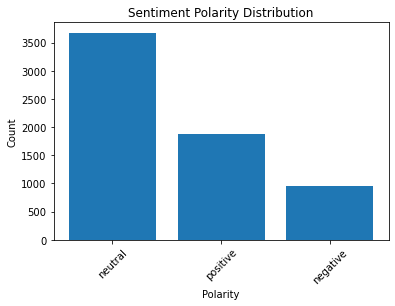

In [26]:
import matplotlib.pyplot as plt

# Data for plotting
polarity_counts = protest_df['sentiment_class'].value_counts()

# Plotting
plt.bar(polarity_counts.index, polarity_counts.values)

# Customize the plot
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')
plt.xticks(rotation=45)

# Display the plot
plt.show()


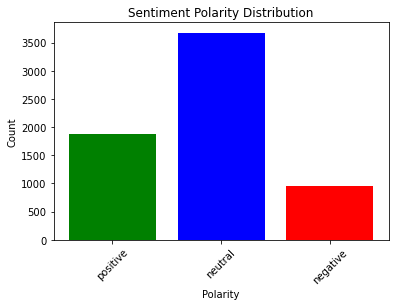

In [27]:
import matplotlib.pyplot as plt

# Data for plotting
polarity_counts = protest_df['sentiment_class'].value_counts()

# Define the desired order of polarities
desired_order = ['positive', 'neutral', 'negative']

# Reorder the polarity counts based on the desired order
polarity_counts = polarity_counts.reindex(desired_order)

# Define colors for each polarity
colors = ['green', 'blue', 'red']

# Plotting
plt.bar(polarity_counts.index, polarity_counts.values, color=colors)

# Customize the plot
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [28]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(protest_df['sentiment_class'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
protest_df_encoded = pd.concat([protest_df, one_hot_encoded], axis=1)

# Print the updated DataFrame
protest_df_encoded.head()


,date,renderedContent,year,month,stopwords,hastags,sentiment_polarity,sentiment_class,negative,neutral,positive
0,2020-11-27,2014 bahut hua kisano par war abki bar modi sa...,2020.0,11.0,6,2,0.000000,neutral,False,True,False
1,2020-11-29,modi medium go back farmersprotest takebackfar...,2020.0,11.0,5,2,-0.027778,negative,True,False,False
2,2020-11-30,supportfarm farmersprotest farmerprotest farme...,2020.0,11.0,1,7,0.000000,neutral,False,True,False
3,2020-11-27,we everi rite protest farmersprotest democraci...,2020.0,11.0,4,1,0.000000,neutral,False,True,False
4,2020-11-30,madam shera di kom dnt think fame defam fight ...,2020.0,11.0,15,1,0.542857,positive,False,False,True


###### Select columns to train the model

In [29]:
selected_cols = ['renderedContent','sentiment_class','negative','neutral','positive']
protest_train = protest_df_encoded[selected_cols]


In [30]:
protest_train.head()

,renderedContent,sentiment_class,negative,neutral,positive
0,2014 bahut hua kisano par war abki bar modi sa...,neutral,False,True,False
1,modi medium go back farmersprotest takebackfar...,negative,True,False,False
2,supportfarm farmersprotest farmerprotest farme...,neutral,False,True,False
3,we everi rite protest farmersprotest democraci...,neutral,False,True,False
4,madam shera di kom dnt think fame defam fight ...,positive,False,False,True


In [31]:
# Identify the column(s) with boolean values
boolean_cols = ['negative', 'neutral', 'positive']

# Convert boolean columns to integers
protest_train[boolean_cols] = protest_train[boolean_cols].astype(int)


/tmp/ipykernel_24285/3285403362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protest_train[boolean_cols] = protest_train[boolean_cols].astype(int)


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'sentiment_class' column
protest_train['sentiment_class'] = label_encoder.fit_transform(protest_df['sentiment_class'])


/tmp/ipykernel_24285/3171903981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protest_train['sentiment_class'] = label_encoder.fit_transform(protest_df['sentiment_class'])


### Creating a Multi Layer Perceptron

### APPLY TRAIN TEST

In [33]:
X = protest_train['renderedContent'].values
y = protest_train.drop('renderedContent', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [35]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [36]:
model = Sequential()

model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [37]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
18/18 [==============================] - 2s 99ms/step - loss: 2.9028 - accuracy: 0.7857 - val_loss: 5.2384 - val_accuracy: 0.8544
Epoch 2/100
18/18 [==============================] - 2s 100ms/step - loss: 15.9628 - accuracy: 0.8448 - val_loss: 39.5541 - val_accuracy: 0.8544
Epoch 3/100
18/18 [==============================] - 2s 108ms/step - loss: 85.9491 - accuracy: 0.7295 - val_loss: 173.6083 - val_accuracy: 0.8544
Epoch 3: early stopping


In [38]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

31/31 [==============================] - 0s 9ms/step - loss: 173.6083 - accuracy: 0.8544
Test accuracy: 0.854358971118927


In [39]:
preds = model.predict(X_test)
preds

61/61 [==============================] - 0s 6ms/step


array([[1.0000000e+00, 0.0000000e+00, 1.5323198e-26, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 5.8523940e-20, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 2.9047568e-29, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 3.9789866e-23, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 5.2213826e-25, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 5.1735881e-22, 0.0000000e+00]],
      dtype=float32)

In [40]:
preds.shape

(1950, 4)

## Time Series

In [41]:
#pip install skforecast --user

In [42]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [43]:
protest_df.head()

,date,renderedContent,year,month,stopwords,hastags,sentiment_polarity,sentiment_class
0,2020-11-27,2014 bahut hua kisano par war abki bar modi sa...,2020.0,11.0,6,2,0.000000,neutral
1,2020-11-29,modi medium go back farmersprotest takebackfar...,2020.0,11.0,5,2,-0.027778,negative
2,2020-11-30,supportfarm farmersprotest farmerprotest farme...,2020.0,11.0,1,7,0.000000,neutral
3,2020-11-27,we everi rite protest farmersprotest democraci...,2020.0,11.0,4,1,0.000000,neutral
4,2020-11-30,madam shera di kom dnt think fame defam fight ...,2020.0,11.0,15,1,0.542857,positive


In [44]:
selected_cols = ['date','sentiment_polarity']
time_df = protest_df_encoded[selected_cols]


In [45]:
time_df.head()

,date,sentiment_polarity
0,2020-11-27,0.000000
1,2020-11-29,-0.027778
2,2020-11-30,0.000000
3,2020-11-27,0.000000
4,2020-11-30,0.542857


In [46]:
import pandas as pd
# Sort the DataFrame based on the 'date' column
time_df = time_df.sort_values('date')

# Reset the index if needed
time_df = time_df.reset_index(drop=True)


In [47]:
time_df.head()

,date,sentiment_polarity
0,2020-11-05,0.000000
1,2020-11-07,0.800000
2,2020-11-12,-0.133333
3,2020-11-23,0.000000
4,2020-11-24,0.045455


In [48]:
#aggregating the date and sentiment polarity

# Group by day and calculate average polarity
aggregated_df = time_df.groupby(time_df['date'].dt.date)['sentiment_polarity'].mean()

# Reset the index
aggregated_df = aggregated_df.reset_index()

# Rename the columns
aggregated_df.columns = ['date', 'sentiment_polarity']

# Sort the DataFrame based on date
aggregated_df = aggregated_df.sort_values('date')

# Reset the index if needed
aggregated_df = aggregated_df.reset_index(drop=True)


In [49]:
aggregated_df= aggregated_df.set_index('date')

In [50]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 2020-11-05 to 2021-11-21
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sentiment_polarity  367 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [51]:
print(f'Number of rows with missing values: {aggregated_df.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [52]:
#verify the completeness of the index
is_complete_index = aggregated_df.index.is_unique
print(is_complete_index)


True


Train dates : 2020-11-05 --- 2021-10-02  (n=317)
Test dates  : 2021-10-03 --- 2021-11-21  (n=50)


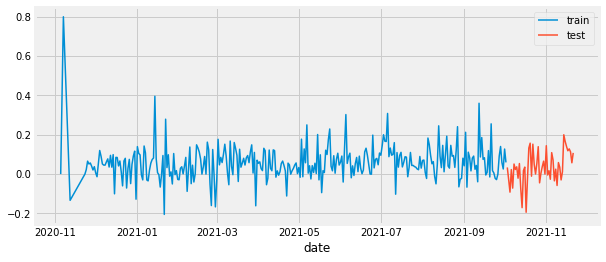

In [53]:
# Split data into train-test
# ==============================================================================
steps = 50
aggregated_train = aggregated_df[:-steps]
aggregated_test = aggregated_df[-steps:]

print(f"Train dates : {aggregated_train.index.min()} --- {aggregated_train.index.max()}  (n={len(aggregated_train)})")
print(f"Test dates  : {aggregated_test.index.min()} --- {aggregated_test.index.max()}  (n={len(aggregated_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
aggregated_train['sentiment_polarity'].plot(ax=ax, label='train')
aggregated_test['sentiment_polarity'].plot(ax=ax, label='test')
ax.legend()


In [54]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 25
                )

forecaster.fit(y=aggregated_train['sentiment_polarity'])
forecaster

/home/hduser/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:799: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:799: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
Transformer for y: None 
Transformer for exog: None 
Window size: 25 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 316] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-05-24 22:25:53 
Last fit date: 2023-05-24 22:25:53 
Skforecast version: 0.8.0 
Python version: 3.10.6 
Forecaster id: None 

In [55]:
# Predictions
# ==============================================================================
steps = 50
predictions = forecaster.predict(steps=steps)
predictions.head()

/home/hduser/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:862: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


25    0.110788
26    0.059651
27    0.070160
28    0.052858
29    0.053595
Name: pred, dtype: float64

(18571.0, 18952.0)

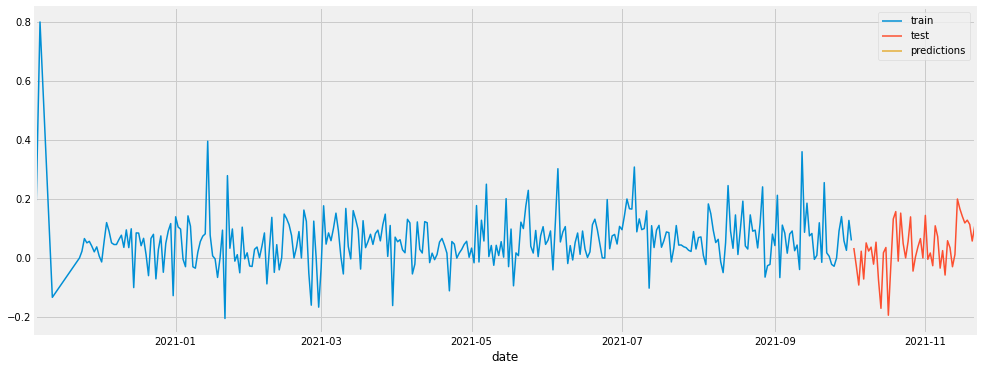

In [56]:
fig, ax = plt.subplots(figsize=(15, 6))
aggregated_train['sentiment_polarity'].plot(ax=ax, label='train')
aggregated_test['sentiment_polarity'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

# Set x-axis range to desired date range
start_date = aggregated_train.index.min()
end_date = aggregated_test.index.max()
ax.set_xlim(start_date, end_date)


In [57]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = aggregated_test['sentiment_polarity'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.007653052020813214


### SAVE THE MODEL

In [58]:
import joblib

# Save the trained model
joblib.dump(forecaster, 'forecaster_model.pkl')


['forecaster_model.pkl']

### DASHBOARD

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

# ... (Previous code snippets)

# Create Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div(children=[
    html.H1('Time Series Dashboard'),
    dcc.Graph(
        id='time-series-plot',
        figure={
            'data': [
                {'x': aggregated_train.index, 'y': aggregated_train['sentiment_polarity'], 'name': 'Train'},
                {'x': aggregated_test.index, 'y': aggregated_test['sentiment_polarity'], 'name': 'Test'},
                {'x': aggregated_test.index, 'y': predictions, 'name': 'Predictions'}
            ],
            'layout': {
                'title': 'Sentiment Polarity',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Sentiment Polarity'},
                'legend': {'orientation': 'h', 'y': -0.2}  # Adjust the legend position
            }
        }
    ),
    dcc.Graph(
        id='time-series-plot-week',
        figure={
            'data': [
                {'x': aggregated_test.index[-7:], 'y': aggregated_test['sentiment_polarity'][-7:], 'name': 'Test'}
            ],
            'layout': {
                'title': 'Sentiment Polarity (1 Week)',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Sentiment Polarity'}
            }
        }
    ),
    dcc.Graph(
        id='time-series-plot-month',
        figure={
            'data': [
                {'x': aggregated_test.index[-30:], 'y': aggregated_test['sentiment_polarity'][-30:], 'name': 'Test'}
            ],
            'layout': {
                'title': 'Sentiment Polarity (1 Month)',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Sentiment Polarity'}
            }
        }
    ),
    dcc.Graph(
        id='time-series-plot-three-months',
        figure={
            'data': [
                {'x': aggregated_test.index[-90:], 'y': aggregated_test['sentiment_polarity'][-90:], 'name': 'Test'}
            ],
            'layout': {
                'title': 'Sentiment Polarity (3 Months)',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Sentiment Polarity'}
            }
        }
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/



/tmp/ipykernel_24285/731155794.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_24285/731155794.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
dash.dash  INFO  Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: off


werkzeug   INFO  WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8050
werkzeug   INFO  Press CTRL+C to quit
werkzeug   INFO  127.0.0.1 - - [24/May/2023 22:26:12] "GET / HTTP/1.1" 200 -
werkzeug   INFO  127.0.0.1 - - [24/May/2023 22:26:12] "GET /_dash-dependencies HTTP/1.1" 200 -
werkzeug   INFO  127.0.0.1 - - [24/May/2023 22:26:12] "GET /_dash-layout HTTP/1.1" 200 -
werkzeug   INFO  127.0.0.1 - - [24/May/2023 22:26:13] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
werkzeug   INFO  127.0.0.1 - - [24/May/2023 22:26:13] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
